# Simple Linear Regression

# Import libraries

In [206]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import data

In [209]:
# Get dataset
df_sal = pd.read_csv('./dataset/salary_datas.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [211]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [213]:
df_sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Analyze data

## Describe

In [215]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [253]:
df_sal.replace([np.inf, -np.inf], np.nan, inplace=True)
df_sal.dropna(inplace=True)


## Distribution

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


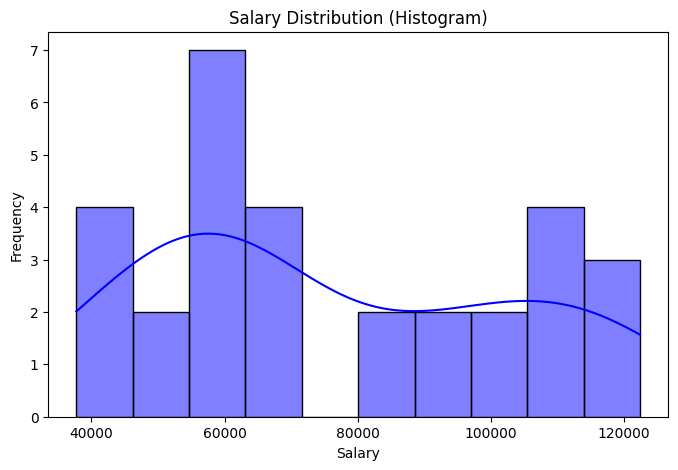

In [256]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sal['Salary'], bins=10, kde=True, color='blue')
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution (Histogram)")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


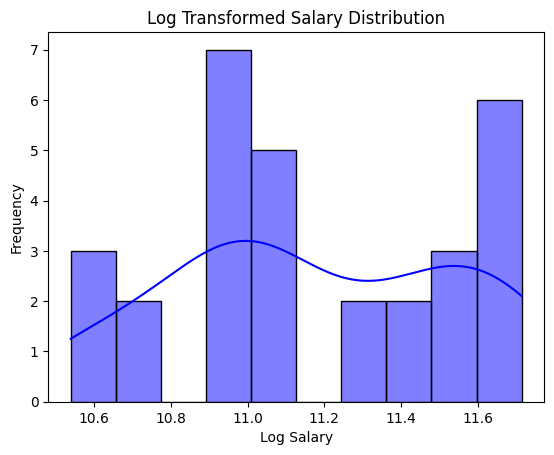

In [258]:
import numpy as np

df_sal['Salary'] = np.log(df_sal['Salary'])

# Replot the histogram after transformation
sns.histplot(df_sal['Salary'], bins=10, kde=True, color='blue')
plt.xlabel("Log Salary")
plt.ylabel("Frequency")
plt.title("Log Transformed Salary Distribution")
plt.show()


## Relationship between Salary and Experience

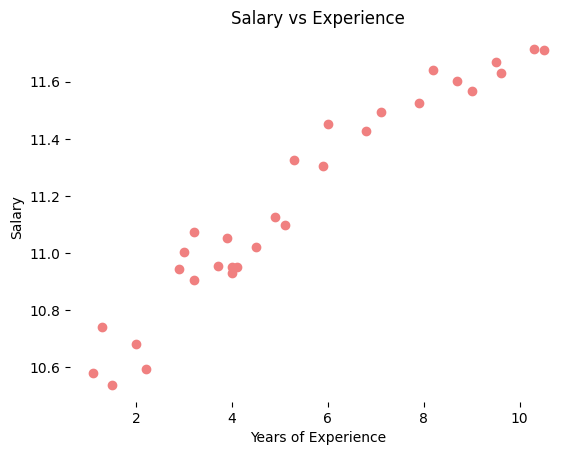

In [261]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

# Split data

## Split into Independent/Dependent variables

In [265]:
# Splitting variables
X = df_sal.iloc[:, :-1].values  # independent
y = df_sal.iloc[:, -1].values  # dependent

In [267]:
y

array([10.58007335, 10.7408433 , 10.53823732, 10.68109076, 10.59390601,
       10.94450604, 11.00459672, 10.9049463 , 11.07356743, 10.95411685,
       11.05434435, 10.92942162, 10.95005188, 10.95222659, 11.02044716,
       11.1263508 , 11.09784932, 11.32765557, 11.3066759 , 11.45041156,
       11.42669197, 11.4955046 , 11.52586143, 11.64230324, 11.60304949,
       11.56724318, 11.66966422, 11.63190778, 11.71497612, 11.71072659])

## Split into Train/Test sets

In [270]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [273]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# Train model

In [276]:
# Regressor model
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

# Predict results

In [279]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In [281]:
y_test

array([10.53823732, 11.71497612, 10.95222659, 11.05434435, 11.66966422,
       11.60304949, 11.63190778, 10.92942162])

In [283]:
y_pred_test

array([10.70695909, 11.83311438, 11.03968679, 11.01409235, 11.73073663,
       11.62835887, 11.74353385, 11.02688957])

In [285]:
y_train.shape

(22,)

# Visualize predictions

## Prediction on training set

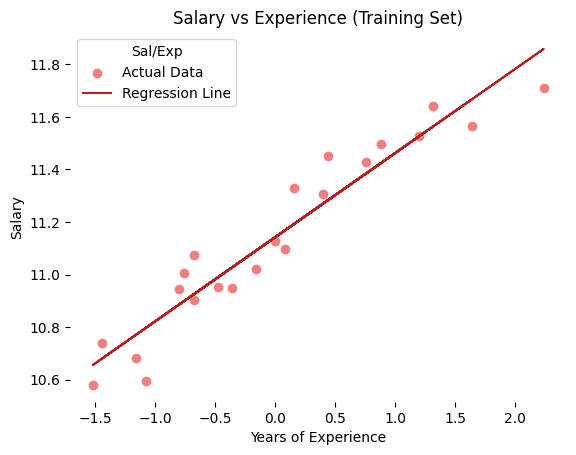

In [289]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral',label='Actual Data')
plt.plot(X_train, y_pred_train, color = 'firebrick',label='Regression Line')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend( title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

## Prediction on test set

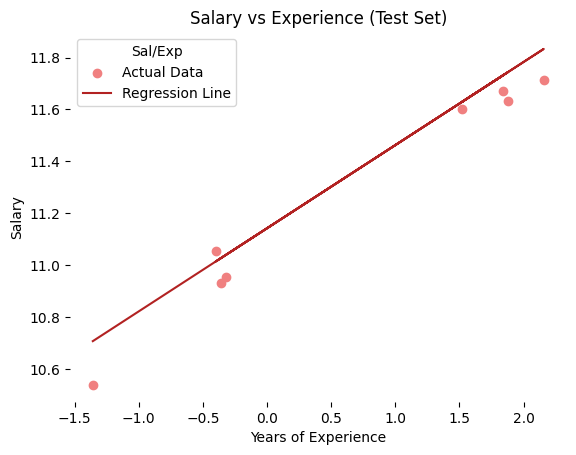

In [292]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral',label='Actual Data')
plt.plot(X_test, y_pred_test, color = 'firebrick',label='Regression Line')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend( title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Coefficient and Intercept

In [295]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [0.32030255]
Intercept: 11.142064543672744


In [297]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_test)  # R² Score

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.08875600562570485
Mean Squared Error (MSE): 0.009752997593575868
Root Mean Squared Error (RMSE): 0.0987572660292693
R² Score: 0.9441906374625757


In [301]:
import numpy as np
  

# Predict salaries for the new experience values
predicted_salaries = regressor.predict(scaler.transform([[1.3]]))
predicted_salary = np.exp(predicted_salaries)
predicted_salary


array([43536.92255963])